# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [1]:
import zipfile

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.   

In [2]:
df = df[df['dt']>='1950-01-01']
df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

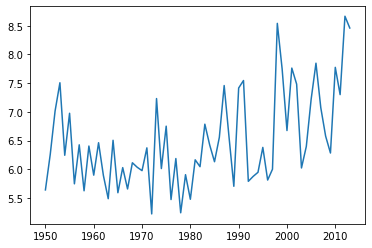

In [3]:
mean_toronto = df[df['City'] == 'Toronto']
mean_toronto = mean_toronto.groupby(mean_toronto.dt.dt.year).mean()
plt.plot(mean_toronto.index, mean_toronto['AverageTemperature'])

# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [4]:
import numpy as np
variance = df.groupby('City')['AverageTemperature'].var()
variance.sort_values().idxmax()

'Harbin'

# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

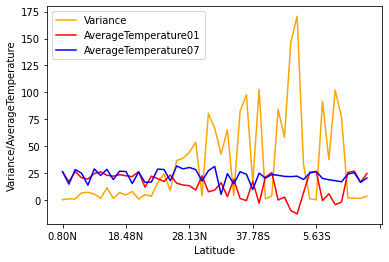

In [5]:
fig, ax = plt.subplots(1, 1)
colors = ['orange', 'red', 'blue']
plt.gca().set_prop_cycle(color=colors)
variance_plot = df.groupby('Latitude')['AverageTemperature'].var()
variance_plot.plot(label = 'Variance')
mean_197501 = df[df['dt'] == '1975-01-01'].groupby('Latitude').mean()
mean_197501.plot(y='AverageTemperature', ax = ax, label = 'AverageTemperature01')
mean_197507 = df[df['dt'] == '1975-07-01'].groupby('Latitude').mean()
mean_197507.plot(y='AverageTemperature', ax = ax, label = 'AverageTemperature07')
plt.ylabel("Variance/AverageTemperature")
plt.legend()

# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

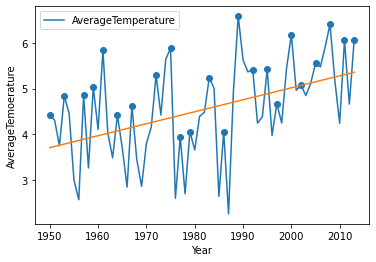

In [6]:
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema
import numpy as np
santpeter = df[df['City'] == 'Saint Petersburg']
santpeter_year = df.groupby(santpeter.dt.dt.year).mean()
santpeter_year.plot(y='AverageTemperature')
plt.ylabel("AverageTemoerature")
plt.xlabel("Year")
santpeter_year_peak = santpeter_year.iloc[argrelextrema(santpeter_year['AverageTemperature'].values, np.greater_equal, order=1)]
plt.scatter(santpeter_year_peak.index, santpeter_year_peak['AverageTemperature'])
santpeter_year

model = LinearRegression()
santpeter_year_index = santpeter_year.index.values.reshape(-1, 1)
reg = model.fit(santpeter_year_index, santpeter_year['AverageTemperature'])
reg_pre = reg.predict(santpeter_year_index)
plt.plot(santpeter_year_index, reg_pre)

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [7]:
#1
df.dropna()
mean_city_year = df['AverageTemperature'].groupby([df['City'], df.dt.dt.year]).mean()
mean_city_year_max = mean_city_year.groupby('City').max()
mean_city_year_min = mean_city_year.groupby('City').min()
(mean_city_year_max - mean_city_year_min).idxmax()

'Mashhad'

In [8]:
mean_city_01 = df['AverageTemperature'].groupby([df['City'], df.dt.dt.month == 1]).mean()
mean_city_07 = df['AverageTemperature'].groupby([df['City'], df.dt.dt.month == 7]).mean()
abs(mean_city_01 - mean_city_07).idxmax()

('Harbin', True)

In [9]:
#3
tem_below = df[df['AverageTemperature'] < 0]
tem_below_year = tem_below['AverageTemperature'].groupby([tem_below['City'], tem_below.dt.dt.year]).count()
tem_below_year
new = tem_below_year.groupby('City').sum()
(new / 64).idxmax()

'Harbin'

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [132]:
import geopandas
import folium
re_df = df[['City', 'Latitude', 'Longitude']]
re_df = re_df.drop_duplicates()
df_10_year = df[df['dt'] >= '2004']
df_10_year = df_10_year['AverageTemperature'].groupby([df_10_year['City'], df_10_year.dt.dt.month == 1]).mean()
df_10_year = df_10_year.loc[:, 1]
re_df = re_df.set_index('City')
geo_test = pd.concat([re_df, df_10_year], axis = 1)
geo_test = geo_test.reset_index()

geo_test.Longitude = geo_test.Longitude.str.replace('W', '')
geo_test['Longitude'] = geo_test['Longitude'].map(lambda x: x if x[-1] == 'E' else -float(x))
geo_test['Longitude'] = geo_test['Longitude'].replace('[A-Z]', '', regex=True)
geo_test.Latitude = geo_test.Latitude.str.replace('S', '')
geo_test['Latitude'] = geo_test.Latitude.map(lambda x: x if x[-1] == 'N' else -float(x))
geo_test.Latitude = geo_test.Latitude.replace('[A-Z]', '', regex=True)

geometry = geopandas.points_from_xy(geo_test.Longitude, geo_test.Latitude)
geo_df = geopandas.GeoDataFrame(
    geo_test[['City', 'AverageTemperature', 'Latitude', 'Longitude']], geometry = geometry
)

map = folium.Map()

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]
i = 0
for coordinates in geo_df_list:
    if geo_df.AverageTemperature[i] >= 20:
        AverageTemperature_color = "green"
    elif geo_df.AverageTemperature[i] >= 10:
        AverageTemperature_color = "blue"
    else:
        AverageTemperature_color = "red"
    map.add_child(
        folium.Marker(
            location = coordinates,
            popup = 
                "City: " + str(geo_df.City[i]) + "<br>"
                + "Latitude: " + str(geo_df.Latitude[i]) + "<br>"
                + "Longitude: " + str(geo_df.Longitude[i]) + "<br>"
                + "AverageTemperature: " + str(geo_df.AverageTemperature[i]),
            icon =  folium.Icon(color="%s" % AverageTemperature_color),
        )
    )
    i = i + 1
map

# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*